In [1]:
# Usage guide:

# This document is not kept on record. If the calcualtions are to be kept,
# copy the whole notebook and put it in "quick_calculations" or appropriate
# folders.

In [2]:
# import all the E9 stuff
import logging
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1,
    "C:\\Users\\ken92\\Documents\\Studies\\E5\\simulation\\E9_simulations")
import E9_fn.E9_constants as E9c
import E9_fn.E9_numbers as E9n
import E9_fn.E9_cooling as cool
from E9_fn import util

# Logging
logpath = '' # '' if not logging to a file
loglevel = logging.INFO
logging.info("unit system: {}".format(E9c.unit_system))
logroot = logging.getLogger()
list(map(logroot.removeHandler, logroot.handlers))
list(map(logroot.removeFilter, logroot.filters))
logging.basicConfig(filename = logpath, level = loglevel)

c:\Users\ken92\anaconda3\envs\spyder-env\Lib\site-packages\gftool\precision.py:16: UserWarning: No quad precision datatypes available!
Some functions might be less accurate.
  warnings.warn("No quad precision datatypes available!\n"


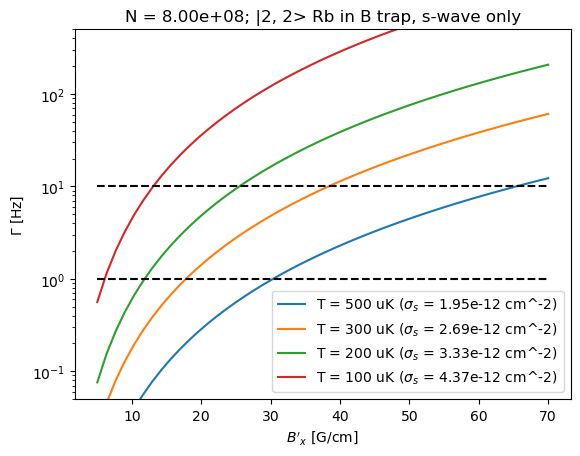

In [3]:
# System size related
# Inputs
# trap_freq_Hz = np.linspace(100, 500)    # (For harmonic traps) range of trap frequencies to look at
B_grad = np.linspace(5, 70)                 # (For B trap) [G/cm] (xy-plane) B field gradient
N_all = .8e9         # includes all spin species
Ts = [500e-6, 300e-6, 200e-6, 100e-6]   # Temperature
a_s = 95 * E9c.a0  # Scattering length; need to find the reference

# print(E9n.Rb87_5_2S1o2_F2.gF * E9c.mu_B * 2 / E9c.hnobar / 1e4 / 1e6)
V_grad = B_grad * 100 * 1.4e6 * E9c.hnobar  # [J/m] potential gradient
fig = plt.figure()
ax = fig.add_subplot(111)
# xsection = 8 * np.pi * a_s**2               # making probing p.49
for T in Ts:
    n = cool.n_peak_lin(N_all, V_grad, T)   # peak density
    k_T = np.sqrt(E9c.k_B * T * E9c.m_Rb87) / E9c.hbar
    xsection = E9n.xsection_s(a_s, k_T) * 2 # * 2 ?
    line_label = "T = {} uK (".format(int(T * 1e6)) + r"$\sigma_s$" \
                + " = {:.2e} cm^-2)".format(xsection * 1e4)
    collision_rate = cool.collision_rate(n, xsection, T = T, m = E9c.m_Rb87)
    ax.plot(B_grad, collision_rate, label = line_label)
    # print("T = {}: (ak)**2 = {}".format(T, (a_s * k_T)**2))
ax.set_title("N = {:.2e}; |2, 2> Rb in B trap, s-wave only".format(N_all))
ax.set_xlabel(r"$B'_x$" + " [G/cm]")
ax.set_ylabel(r"$\Gamma$" + " [Hz]")
ax.set_yscale("log")
ax.set_ylim(0.05, 500)
ax.legend()
ax.hlines([1, 10], B_grad[0], B_grad[-1], colors = "k", linestyles = "--")

In [4]:
E9n.LambDickeConst(806*6.7, 5*532e-9)

0.3105318482067853